# Tarea 4

#### Nombre : Silvio Varela

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**1.-** *Verifique para qué valor de N={447, 448}, la suma de enteros desde n=1 a n=N es igual
o mayor que 100000, según el ejemplo de while visto en clases.*

In [4]:
total = 0
N = 0
while not (total >= 1e5):
    N += 1 
    total = total + N
print("Total is {} for N={}".format(total,N))

Total is 100128 for N=447


2.- Escriba una función que encuentre los primeros M números primos o todos los primos
menores que N, trate de reducir el tiempo de ejecución (puede monitorear usando la
función %timeit). Realice un gráfico del número de primos (cumulativo) vs N para M =
250.000 y para N=10.000.000.

In [5]:
def primos(N=None,M=None):
    
    if N!=None:
        List = np.arange(2,N,1,dtype=int)
        i=0
        while i<len(List):
            elem = List[i]
            ind = (List%elem!=0)|(List==elem)
            List= List[ind]
            i+=1
        return List
    
    elif M!=None:
        primo,j=[],2
        while not (len(primo)==M):
            if len(primo)>1:
                for i,k in enumerate(primo):
                    if j%k==0:
                        break
                    if i==len(primo)-1:
                        primo.append(j)
                    
            else:
                primo.append(j)
            j+=1
        return np.array(primo)
    else:
        print('Ingrese valor M o N')
    


In [6]:
%timeit primos(N=1000)

851 µs ± 6.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit primos(M=200)

1.93 ms ± 4.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
N=60
Nval = range(1,N+1)
PrimosList = primos(N=N)
Nacumulativo = [len(PrimosList[PrimosList<=i]) for i in Nval]

In [22]:
M=20
PrimosList = primos(M=M)
Nval_M = range(1,PrimosList.max()+1)
Nacumulativo_M = [len(PrimosList[PrimosList<=i]) for i in Nval_M]

Text(0.5, 0, 'N')

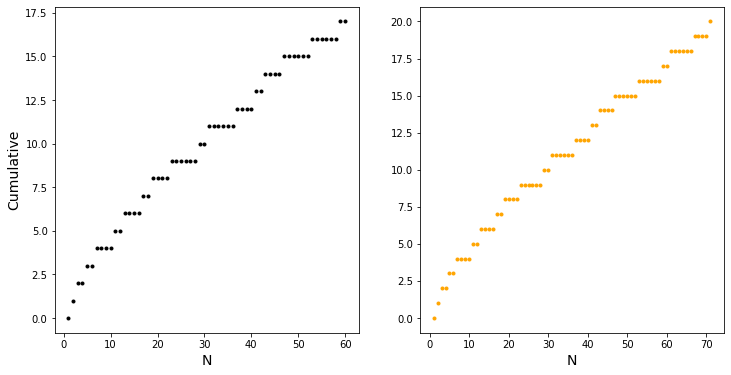

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(Nval,Nacumulativo,lw=0,marker='.',color='k')
plt.ylabel('Cumulative',fontsize=14)
plt.xlabel('N',fontsize=14)

plt.subplot(1,2,2)
plt.plot(Nval_M,Nacumulativo_M,lw=0,marker='.',color='orange')
plt.xlabel('N',fontsize=14)


3.- Implemente el código para crear la misma “imagen” de un gradiente de la clase 06, pero
utilizando listas por comprensión y realice un gráfico similar.

In [38]:
xval = range(200)
yval = range(200)

xcen = 120
ycen = 20

img = [[np.sqrt( (i-xcen)**2 + (j-ycen)**2) for i in xval] for j in yval]

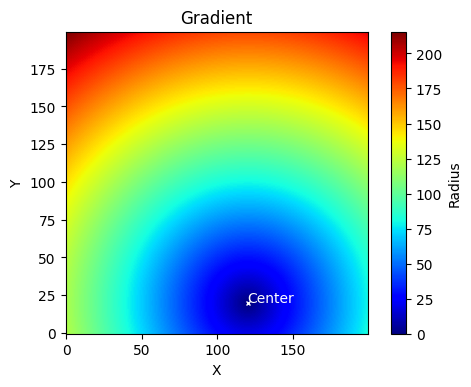

In [39]:
fig, ax = plt.subplots(1,1, dpi=(100),subplot_kw={'aspect':'equal'})
v = ax.imshow(img, origin='lower',cmap='jet')
cbar = fig.colorbar(v)
cbar.set_label("Radius")
ax.plot(xcen, ycen, 'wx', ms=3)
ax.text(xcen, ycen, "Center", color='w')
ax.set_xlabel('X')
ax.set_ylabel("Y")
ax.set_title("Gradient");